## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output = "pandas")

In [2]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [3]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

In [4]:
X_train.shape

(892, 43)

In [5]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
X_test = X_test [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]
#X_test = X_test.drop(columns = 'alc')

In [6]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [7]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [8]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [9]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [11]:
# Predicting Alcohol Consumption
y_pred = knn.predict(X_test)

In [12]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,1.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
204,0.0,0.0
205,0.0,0.0
206,0.0,1.0
207,0.0,1.0


In [13]:
# !pip install scikit-plot


In [14]:
import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.5023923444976076


              precision    recall  f1-score   support

         0.0       0.62      0.46      0.53       127
         1.0       0.40      0.56      0.47        82

    accuracy                           0.50       209
   macro avg       0.51      0.51      0.50       209
weighted avg       0.54      0.50      0.51       209



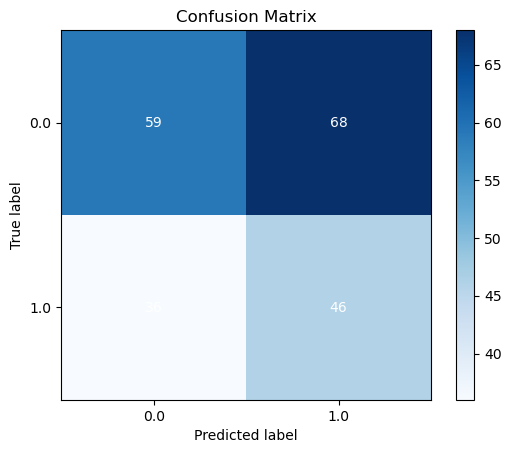

In [15]:
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
#save_fig('Confusion Matrix for KNN q3')

## Decision Tree

In [16]:
from matplotlib import pyplot as plt
from sklearn import tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.737


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

fig.savefig("decistion_tree.png")


In [18]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Max Depth =  1 , Train Acc. =  0.535 , Test Acc. =  0.383
Max Depth =  2 , Train Acc. =  0.564 , Test Acc. =  0.397
Max Depth =  3 , Train Acc. =  0.571 , Test Acc. =  0.397
Max Depth =  4 , Train Acc. =  0.595 , Test Acc. =  0.55
Max Depth =  5 , Train Acc. =  0.631 , Test Acc. =  0.603
Max Depth =  6 , Train Acc. =  0.652 , Test Acc. =  0.526
Max Depth =  7 , Train Acc. =  0.68 , Test Acc. =  0.56
Max Depth =  8 , Train Acc. =  0.73 , Test Acc. =  0.632
Max Depth =  9 , Train Acc. =  0.759 , Test Acc. =  0.665
Max Depth =  10 , Train Acc. =  0.818 , Test Acc. =  0.66
Max Depth =  11 , Train Acc. =  0.85 , Test Acc. =  0.713
Max Depth =  12 , Train Acc. =  0.882 , Test Acc. =  0.708
Max Depth =  13 , Train Acc. =  0.895 , Test Acc. =  0.708
Max Depth =  14 , Train Acc. =  0.899 , Test Acc. =  0.742
Max Depth =  15 , Train Acc. =  0.9 , Test Acc. =  0.722
Max Depth =  16 , Train Acc. =  0.905 , Test Acc. =  0.727
Max Depth =  17 , Train Acc. =  0.905 , Test Acc. =  0.727
Max Depth =  1

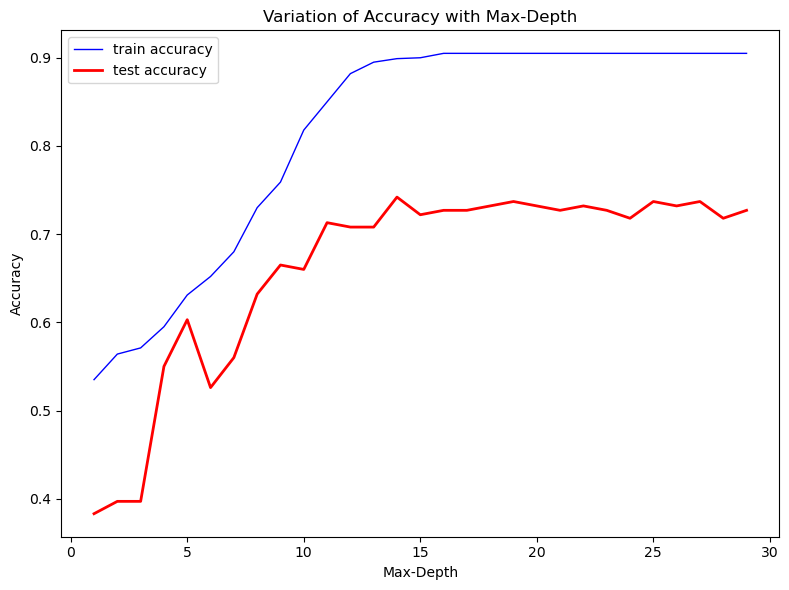

In [19]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [20]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, dt.predict(X_train)))


Confusion Matrix for Train Set


,0,1
0,415,31
1,54,392


In [21]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, dt.predict(X_test)))

Confusion Matrix for Test Set


,0,1
0,92,35
1,20,62


In [22]:
print("Classification Report for Train Set")
print(classification_report (y_train, dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       446
         1.0       0.93      0.88      0.90       446

    accuracy                           0.90       892
   macro avg       0.91      0.90      0.90       892
weighted avg       0.91      0.90      0.90       892



In [23]:
print("Classification Report for Test Set")
print(classification_report(y_test, dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77       127
         1.0       0.64      0.76      0.69        82

    accuracy                           0.74       209
   macro avg       0.73      0.74      0.73       209
weighted avg       0.75      0.74      0.74       209



## Hyperparameter Tuning on Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [25]:
param_grid= {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [26]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [27]:
# Finding out the best estimator
best_grid = grid_search_rf.best_estimator_
best_grid

RandomForestClassifier(criterion='log_loss', max_depth=100, max_features=None,
                       n_estimators=50)

In [28]:
best_grid.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=100, max_features=None,
                       n_estimators=50)

In [29]:
best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[59 68]
 [36 46]]
Accuracy Score 0.5023923444976076
Classification report:               precision    recall  f1-score   support

         0.0       0.62      0.46      0.53       127
         1.0       0.40      0.56      0.47        82

    accuracy                           0.50       209
   macro avg       0.51      0.51      0.50       209
weighted avg       0.54      0.50      0.51       209



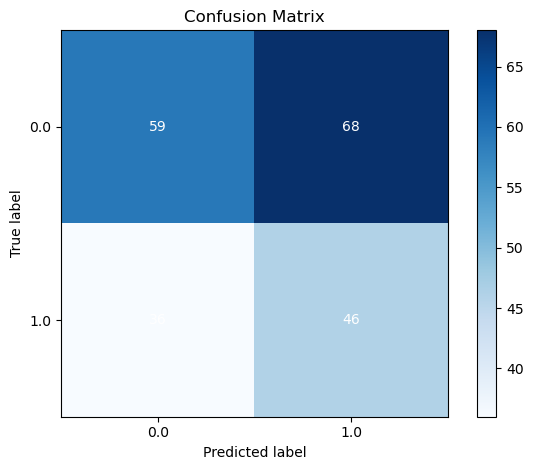

In [30]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

[[92 35]
 [17 65]]
0.7511961722488039
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78       127
         1.0       0.65      0.79      0.71        82

    accuracy                           0.75       209
   macro avg       0.75      0.76      0.75       209
weighted avg       0.77      0.75      0.75       209



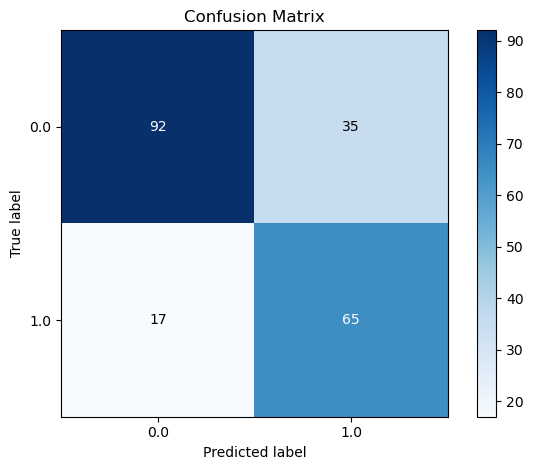

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
skplt.metrics.plot_confusion_matrix(y_test, prediction);
save_fig('Confusion Matrix for Random forest q3')
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

## Reshaping (Not Necessary)

 y_train.values.reshape(-1, 1)

X_train.values

## Hyperparameter Tuning on KNN

In [33]:
from sklearn.model_selection import GridSearchCV


In [34]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [35]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [36]:
best_grid = grid_search_knn.best_estimator_

In [37]:
best_grid

KNeighborsClassifier(n_neighbors=10, weights='distance')

[[90 37]
 [19 63]]
Accuracy Score 0.7320574162679426
Classification report:               precision    recall  f1-score   support

         0.0       0.83      0.71      0.76       127
         1.0       0.63      0.77      0.69        82

    accuracy                           0.73       209
   macro avg       0.73      0.74      0.73       209
weighted avg       0.75      0.73      0.74       209



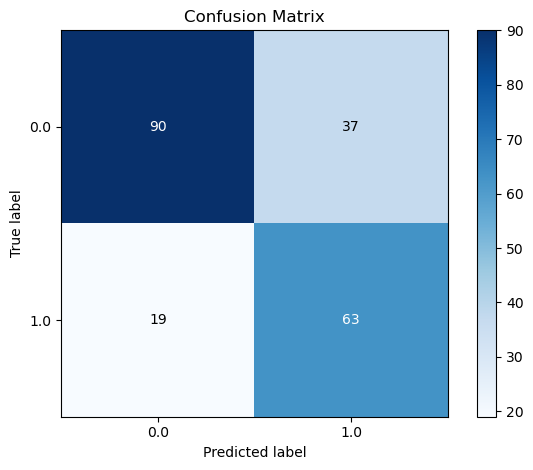

In [38]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Decision Tree

In [39]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
    'max_features' : ['auto', 'sqrt']
}

In [40]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been depre

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been depre

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [41]:
best_grid = grid_search_dt.best_estimator_
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='auto')

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[[90 37]
 [20 62]]
Accuracy Score 0.7272727272727273
Classification report:               precision    recall  f1-score   support

         0.0       0.82      0.71      0.76       127
         1.0       0.63      0.76      0.69        82

    accuracy                           0.73       209
   macro avg       0.72      0.73      0.72       209
weighted avg       0.74      0.73      0.73       209



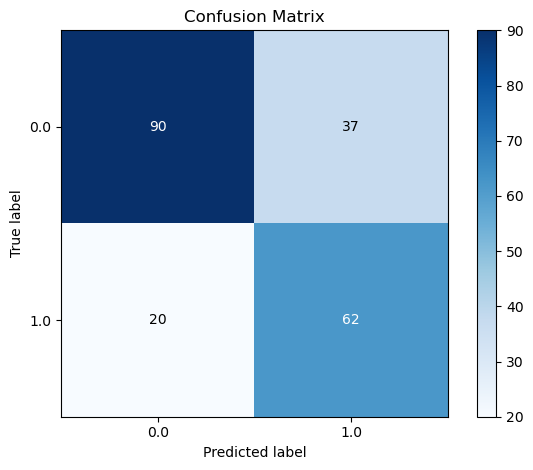

In [42]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Max Depth =  1 , Train Acc. =  0.535 , Test Acc. =  0.383
Max Depth =  2 , Train Acc. =  0.564 , Test Acc. =  0.397
Max Depth =  3 , Train Acc. =  0.571 , Test Acc. =  0.397
Max Depth =  4 , Train Acc. =  0.595 , Test Acc. =  0.55
Max Depth =  5 , Train Acc. =  0.631 , Test Acc. =  0.603
Max Depth =  6 , Train Acc. =  0.652 , Test Acc. =  0.531
Max Depth =  7 , Train Acc. =  0.68 , Test Acc. =  0.56
Max Depth =  8 , Train Acc. =  0.73 , Test Acc. =  0.632
Max Depth =  9 , Train Acc. =  0.759 , Test Acc. =  0.67
Max Depth =  10 , Train Acc. =  0.817 , Test Acc. =  0.665
Max Depth =  11 , Train Acc. =  0.85 , Test Acc. =  0.727
Max Depth =  12 , Train Acc. =  0.882 , Test Acc. =  0.718
Max Depth =  13 , Train Acc. =  0.895 , Test Acc. =  0.703
Max Depth =  14 , Train Acc. =  0.899 , Test Acc. =  0.727
Max Depth =  15 , Train Acc. =  0.9 , Test Acc. =  0.718
Max Depth =  16 , Train Acc. =  0.905 , Test Acc. =  0.727
Max Depth =  17 , Train Acc. =  0.905 , Test Acc. =  0.727
Max Depth =  1

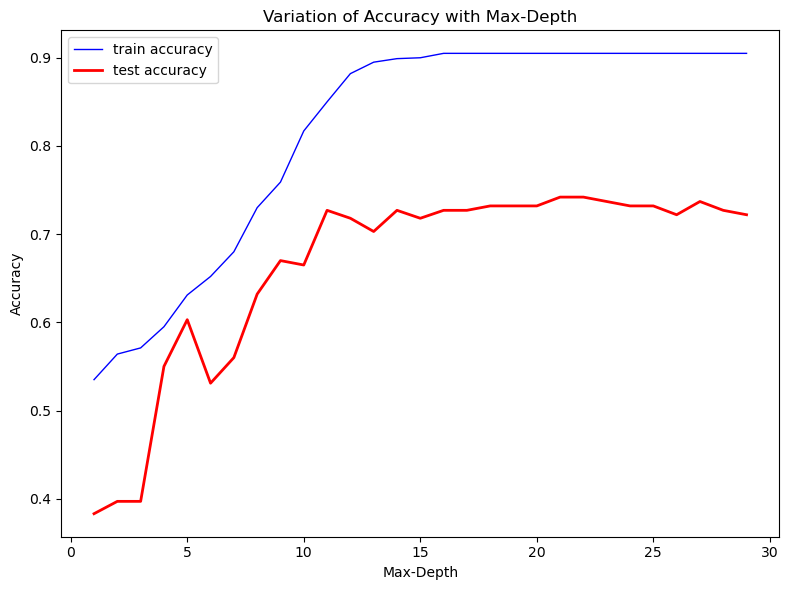

In [43]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

## Hyperparameter Tuning on Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [69]:
lr_grid = LogisticRegression()
grid_search_lg = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lg.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.9041e-18): result may not be accurate.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [70]:
best_grid = grid_search_lg.best_estimator_
best_grid

LogisticRegression(penalty='l1', solver='liblinear')

[[74 53]
 [34 48]]
Accuracy Score 0.583732057416268
Classification report:               precision    recall  f1-score   support

         0.0       0.69      0.58      0.63       127
         1.0       0.48      0.59      0.52        82

    accuracy                           0.58       209
   macro avg       0.58      0.58      0.58       209
weighted avg       0.60      0.58      0.59       209



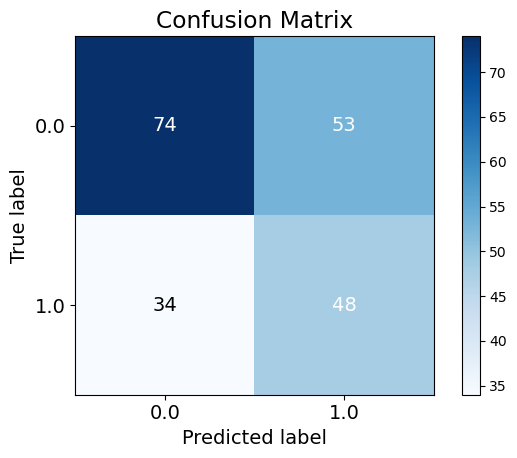

In [71]:
# Applying the best grid for logistic regression
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [49]:
from sklearn.svm import SVC

In [50]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'decision_function_shape' : ['ovo', 'ovr'],
    'break_ties' : [True, False]
}

In [51]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/met

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, m

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=Non

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=N

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=No

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/met

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; t

(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse4

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py",

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_feat

[CV] END criterion=entropy, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_

[CV] END criterion=entropy, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_

[CV] END criterion=entropy, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max

[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, ma

[CV] END criterion=log_loss, max_depth=15, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=newton-cg; total time=   0

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, p

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=lin

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto,

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, p

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, 

[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel

[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probab

[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probabili

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.54837703 0.54837703
 0.54837703 0.54837703 0.54837703 0.54837703 0.54837703 0.54837703
 0.59305868 0.593058

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [52]:
best_grid = grid_search_svc.best_estimator_
best_grid

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

[[65 62]
 [34 48]]
Accuracy Score 0.5406698564593302
Classification report:               precision    recall  f1-score   support

         0.0       0.66      0.51      0.58       127
         1.0       0.44      0.59      0.50        82

    accuracy                           0.54       209
   macro avg       0.55      0.55      0.54       209
weighted avg       0.57      0.54      0.55       209



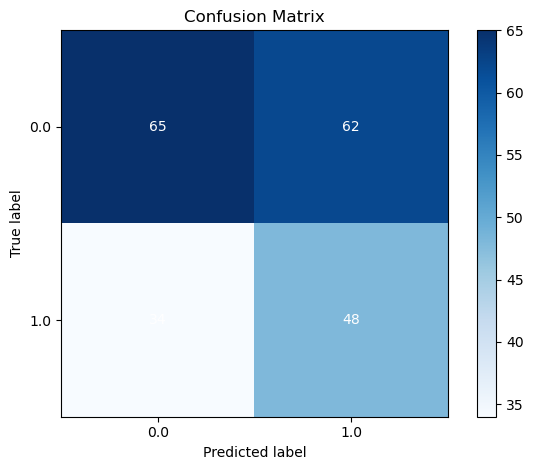

In [53]:
# Applying the best grid for SVC
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [54]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [56]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf)
    ], 
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [57]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6076555023923444
RandomForestClassifier 0.7272727272727273
SVC 0.5358851674641149
VotingClassifier 0.5980861244019139


## Soft voting classifier

In [58]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability = True)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf)
    ], 
    voting = 'soft'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [59]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6076555023923444
RandomForestClassifier 0.7272727272727273
SVC 0.5358851674641149
VotingClassifier 0.7129186602870813


## bagging and pasting

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [61]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.7567264573991032
Test Accuracy 0.7320574162679426


## impact of no. of estimators

In [62]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.7062780269058296  test acc =  0.5933014354066986 oob =  0.5986547085201793
Num of estimators:  100  train acc =  0.6984304932735426  test acc =  0.5933014354066986 oob =  0.6109865470852018
Num of estimators:  150  train acc =  0.7152466367713004  test acc =  0.6076555023923444 oob =  0.6042600896860987
Num of estimators:  200  train acc =  0.7208520179372198  test acc =  0.5885167464114832 oob =  0.6031390134529148
Num of estimators:  250  train acc =  0.7197309417040358  test acc =  0.5885167464114832 oob =  0.5997757847533632
Num of estimators:  300  train acc =  0.726457399103139  test acc =  0.5933014354066986 oob =  0.5919282511210763
Num of estimators:  350  train acc =  0.7242152466367713  test acc =  0.6076555023923444 oob =  0.5997757847533632
Num of estimators:  400  train acc =  0.7275784753363229  test acc =  0.5980861244019139 oob =  0.5964125560538116
Num of estimators:  450  train acc =  0.7242152466367713  test acc =  0.6028708133

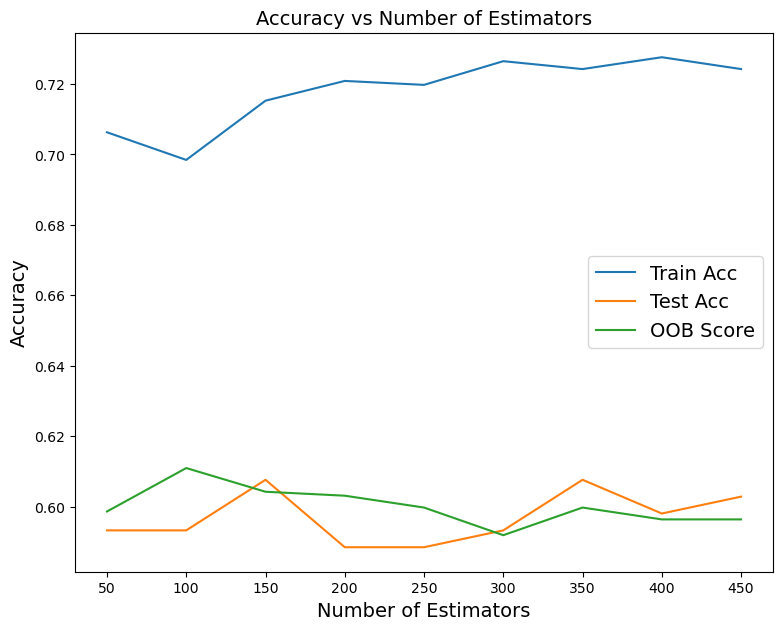

In [63]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6076555023923444

In [65]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

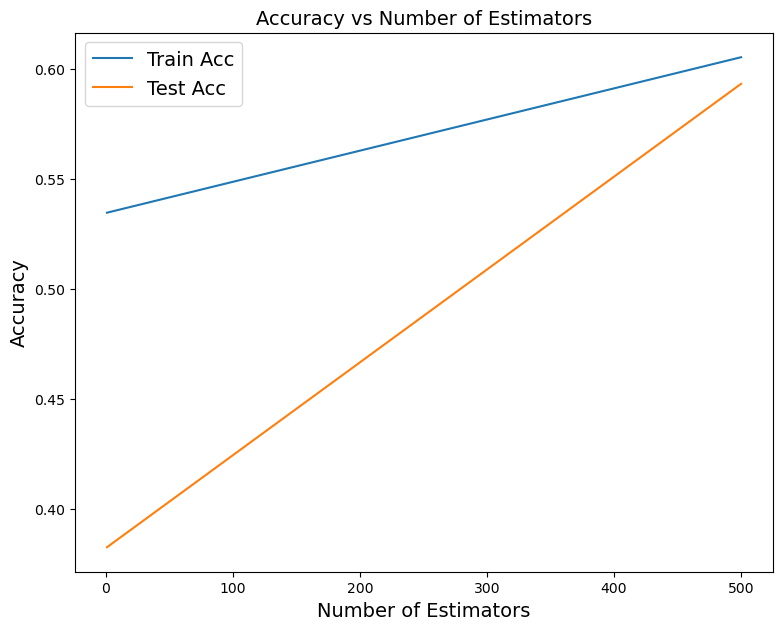

In [66]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## Logistic Regression

## XAI

## SVM